<a href="https://colab.research.google.com/github/kusumithatadavarthi/myntraprojectmlmine/blob/main/Copy_of_Untitled4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
import pandas as pd

import re
import string
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
!pip install xgboost
from xgboost import XGBRegressor
from sklearn import metrics

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dt=pd.read_csv('/content/project.csv')

In [ ]:
dt.shape

(148, 4)

In [ ]:
dt.head(20)

,days,cost,stitching,discount
0,2,2390,1,10.0
1,3,3490,1,20.0
2,4,1200,0,5.0
3,5,250,1,0.0
4,6,2340,0,10.0
5,7,1223,1,4.0
6,2,321,1,1.0
7,4,2321,1,9.0
8,6,2345,0,10.0
9,1,7890,1,24.0


In [ ]:


dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   days       148 non-null    int64  
 1   cost       148 non-null    int64  
 2   stitching  148 non-null    int64  
 3   discount   148 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 4.8 KB


In [ ]:
dt.isnull().sum()

days         0
cost         0
stitching    0
discount     0
dtype: int64

In [ ]:

dt.describe()

,days,cost,stitching,discount
count,148.000000,148.000000,148.000000,148.000000
mean,3.358108,2442.804054,0.500000,10.746622
std,1.769008,1976.732478,0.501698,8.278218
min,1.000000,100.000000,0.000000,0.000000
25%,2.000000,987.000000,0.000000,3.000000
50%,3.000000,2183.500000,0.500000,9.000000
75%,5.000000,3490.000000,1.000000,19.000000
max,7.000000,9090.000000,1.000000,26.000000


In [ ]:
dt['discount'].value_counts()

discount
10.0    17
2.0     17
1.0     15
20.0    15
4.0     11
9.0     11
19.0    11
25.0    10
5.0      8
26.0     4
8.0      4
7.5      4
0.0      4
24.0     3
17.0     3
16.0     3
3.0      2
11.0     2
17.5     1
14.0     1
12.0     1
21.0     1
Name: count, dtype: int64

In [ ]:
x=dt.drop(columns='discount',axis=1 )
y=dt['discount']

In [ ]:
print(x)

     days  cost  stitching
0       2  2390          1
1       3  3490          1
2       4  1200          0
3       5   250          1
4       6  2340          0
..    ...   ...        ...
143     5  2789          0
144     3  3890          0
145     3  3890          1
146     3  2789          1
147     3  2789          0

[148 rows x 3 columns]


In [ ]:
print(y)

0      10.0
1      20.0
2       5.0
3       0.0
4      10.0
       ... 
143    17.0
144    20.0
145    19.0
146    16.0
147    17.0
Name: discount, Length: 148, dtype: float64


In [ ]:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)

In [ ]:
print(x.shape,x_train.shape,x_test.shape)

(148, 3) (118, 3) (30, 3)


In [ ]:
#here we are using linear regression model
model= XGBRegressor()

























In [ ]:
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
trainingdp=model.predict(x_train)

In [ ]:
print(trainingdp)

[9.00211620e+00 1.99609327e+00 2.59994717e+01 2.40005341e+01
 4.00084877e+00 5.00041485e+00 2.59975262e+01 2.59991951e+01
 2.49998035e+01 4.99801922e+00 9.98844385e-01 5.00041485e+00
 2.07631645e-04 1.70019455e+01 1.89997234e+01 1.00116501e+01
 8.00991631e+00 7.49920511e+00 1.00050364e+01 1.00223124e+00
 1.00098877e+01 6.50090742e+00 4.00046444e+00 2.00008240e+01
 8.99627686e+00 9.99560928e+00 1.00152493e+00 1.00010757e+01
 1.99954491e+01 8.99855328e+00 1.50122416e+00 2.99556947e+00
 1.09871807e+01 2.50021191e+01 1.99990749e+01 7.49639034e+00
 2.39999485e+01 1.00001640e+01 9.00092793e+00 9.00211620e+00
 1.90005035e+01 1.50122416e+00 4.00270128e+00 9.99097109e-01
 9.00222301e+00 9.98554897e+00 9.99715042e+00 2.50026264e+01
 9.99073315e+00 1.99627745e+00 1.90005035e+01 9.99766767e-01
 9.97528911e-01 2.00012093e+01 1.59991255e+01 2.00008240e+01
 9.98817444e+00 7.51532221e+00 2.50009155e+01 7.49920511e+00
 1.69958344e+01 2.00589848e+00 6.50090742e+00 1.10002394e+01
 9.99294376e+00 1.998162

In [ ]:
sc=metrics.r2_score(y_train,trainingdp)

In [ ]:
sc2=metrics.mean_absolute_error(y_train,trainingdp)

In [ ]:
print(sc)

0.9948000083305196


In [ ]:

print(sc2)

0.15528808331133806


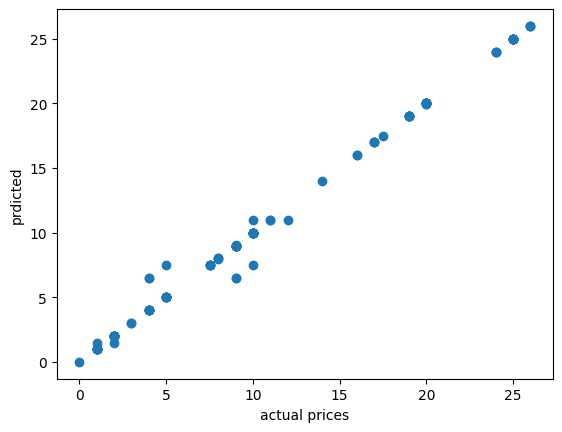

In [ ]:
plt.scatter(y_train,trainingdp)
plt.xlabel("actual prices")
plt.ylabel("prdicted")
plt.show()

In [ ]:
tesdt=model.predict(x_test)

In [ ]:

print(tesdt)

[24.237566    9.146308    1.2698048   1.0014303   1.5385333  19.856781
  0.99371326  1.9981624   4.585963   19.106064   18.997135    1.0744469
  1.7324893  20.123592    4.054471    2.7027185  20.18011    19.78021
  5.659726    1.2698048  19.964699   25.955421   16.064116    0.9975289
  2.2519462  19.995558   16.082865   19.744528   10.127093    4.0004644 ]


In [ ]:
sc=metrics.r2_score(y_test,tesdt)
sc2=metrics.mean_absolute_error(y_test,tesdt)

In [ ]:

print(sc)

0.9480166059144236


In [ ]:
print(sc2)

0.911297861735026


In [ ]:
input_dt=(1,50,1) # Remove the extra feature
#chnage the input data to a numpy array
ip=np.asarray(input_dt)
#reshape the numpy array for one instance
ip_reshaped=ip.reshape(1,-1)
prediction=model.predict(ip_reshaped)
print(prediction)

[1.8061215]


In [ ]:
input_dt=(2,2500,0) # Remove the extra feature
#chnage the input data to a numpy array
ip=np.asarray(input_dt)
#reshape the numpy array for one instance
ip_reshaped=ip.reshape(1,-1)
prediction=model.predict(ip_reshaped)
print(prediction)

[10.987181]


In [ ]:
input_dt=(2,250,1) # Remove the extra feature
#chnage the input data to a numpy array
ip=np.asarray(input_dt)
#reshape the numpy array for one instance
ip_reshaped=ip.reshape(1,-1)
prediction=model.predict(ip_reshaped)
print(prediction)

[1.5012242]


In [ ]:
input_dt=(2,250,0) # Remove the extra feature
#chnage the input data to a numpy array
ip=np.asarray(input_dt)
#reshape the numpy array for one instance
ip_reshaped=ip.reshape(1,-1)
prediction=model.predict(ip_reshaped)
print(prediction)

[2.9932153]


In [ ]:
input_dt=(2,750,1) # Remove the extra feature
#chnage the input data to a numpy array
ip=np.asarray(input_dt)
#reshape the numpy array for one instance
ip_reshaped=ip.reshape(1,-1)
prediction=model.predict(ip_reshaped)
print(prediction)

[0.9990971]


In [ ]:

input_dt=(5,3546,0) # Remove the extra feature
#chnage the input data to a numpy array
ip=np.asarray(input_dt)
#reshape the numpy array for one instance
ip_reshaped=ip.reshape(1,-1)
prediction=model.predict(ip_reshaped)
print(prediction)

[20.00476]


In [ ]:
input_dt=(7,786,1) # Remove the extra feature
#chnage the input data to a numpy array
ip=np.asarray(input_dt)
#reshape the numpy array for one instance
ip_reshaped=ip.reshape(1,-1)
prediction=model.predict(ip_reshaped)
print(prediction)

[0.5500137]


In [ ]:
input_dt=(3,265,1) # Remove the extra feature
#chnage the input data to a numpy array
ip=np.asarray(input_dt)
#reshape the numpy array for one instance
ip_reshaped=ip.reshape(1,-1)
prediction=model.predict(ip_reshaped)
print(prediction)

[1.0203085]


In [ ]:
input_dt=(3,250,0) # Remove the extra feature
#chnage the input data to a numpy array
ip=np.asarray(input_dt)
#reshape the numpy array for one instance
ip_reshaped=ip.reshape(1,-1)
prediction=model.predict(ip_reshaped)
print(prediction)

[2.0058985]


In [ ]:
input_dt=(2,250,0) # Remove the extra feature
#chnage the input data to a numpy array
ip=np.asarray(input_dt)
#reshape the numpy array for one instance
ip_reshaped=ip.reshape(1,-1)
prediction=model.predict(ip_reshaped)
print(prediction)

[2.9932153]


In [ ]:

input_dt=(4,2244,1) # Remove the extra feature
#chnage the input data to a numpy array
ip=np.asarray(input_dt)
#reshape the numpy array for one instance
ip_reshaped=ip.reshape(1,-1)
prediction=model.predict(ip_reshaped)
print(prediction)

[9.030111]


In [ ]:
input_dt=(3,909,1) # Remove the extra feature
#chnage the input data to a numpy array
ip=np.asarray(input_dt)
#reshape the numpy array for one instance
ip_reshaped=ip.reshape(1,-1)
prediction=model.predict(ip_reshaped)
print(prediction)

[0.9979528]


In [ ]:
input_dt=(6,2345,0) # Remove the extra feature
#chnage the input data to a numpy array
ip=np.asarray(input_dt)
#reshape the numpy array for one instance
ip_reshaped=ip.reshape(1,-1)
prediction=model.predict(ip_reshaped)
print(prediction)

[10.127093]


In [ ]:
input_dt=(7,1500,0) # Remove the extra feature
#chnage the input data to a numpy array
ip=np.asarray(input_dt)
#reshape the numpy array for one instance
ip_reshaped=ip.reshape(1,-1)
prediction=model.predict(ip_reshaped)
print(prediction)

[4.998019]


In [ ]:
input_dt=(7,1500,1) # Remove the extra feature
#chnage the input data to a numpy array
ip=np.asarray(input_dt)
#reshape the numpy array for one instance
ip_reshaped=ip.reshape(1,-1)
prediction=model.predict(ip_reshaped)
print(prediction)

[3.9992466]


In [ ]:
input_dt=(6,250,1) # Remove the extra feature
#chnage the input data to a numpy array
ip=np.asarray(input_dt)
#reshape the numpy array for one instance
ip_reshaped=ip.reshape(1,-1)
prediction=model.predict(ip_reshaped)
print(prediction)

[1.245379]


In [ ]:
input_dt=(3,2789,0) # Remove the extra feature
#chnage the input data to a numpy array
ip=np.asarray(input_dt)
#reshape the numpy array for one instance
ip_reshaped=ip.reshape(1,-1)
prediction=model.predict(ip_reshaped)
print(prediction)

[16.998882]


In [ ]:
input_dt=(3,2789,0) # Remove the extra feature
#chnage the input data to a numpy array
ip=np.asarray(input_dt)
#reshape the numpy array for one instance
ip_reshaped=ip.reshape(1,-1)
prediction=model.predict(ip_reshaped)
print(prediction)

[16.998882]


In [ ]:
input_dt=(1,3500,0) # Remove the extra feature
#chnage the input data to a numpy array
ip=np.asarray(input_dt)
#reshape the numpy array for one instance
ip_reshaped=ip.reshape(1,-1)
prediction=model.predict(ip_reshaped)
print(prediction)

[19.983007]


In [ ]:
input_dt=(3,3789,0) # Remove the extra feature
#chnage the input data to a numpy array
ip=np.asarray(input_dt)
#reshape the numpy array for one instance
ip_reshaped=ip.reshape(1,-1)
prediction=model.predict(ip_reshaped)
print(prediction)

[19.999075]


In [ ]:
input_dt=(2,2500,1) # Remove the extra feature
#chnage the input data to a numpy array
ip=np.asarray(input_dt)
#reshape the numpy array for one instance
ip_reshaped=ip.reshape(1,-1)
prediction=model.predict(ip_reshaped)
print(prediction)


[10.014064]


In [ ]:
34


34